In [1]:
import sys
import os
import ipyplot
sys.path.append('../RanDepict/')

from RanDepict import random_depictor

## Depict chemical structures with CDK, RDKit or Indigo

After calling an instance of random_depictor, depictions with randomly chosen parameters are created by calling the functions
- depict_and_resize_cdk(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_rdkit(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_indigo(
      smiles: str, 
      image_shape: Tuple[int,int]
  )


The SMILES string needs to be given, the image_shape defaults to (299,299,3).

Each of these functions returns an np.array which represents an RGB image of the chemical structure.

_________________ CDK depictions _________________



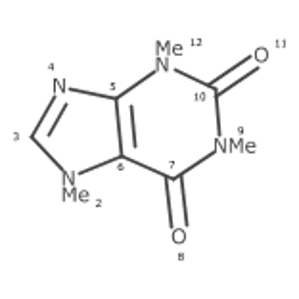
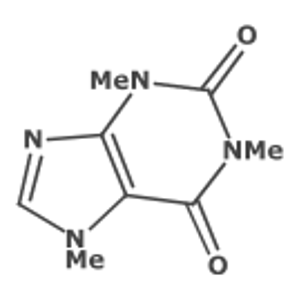
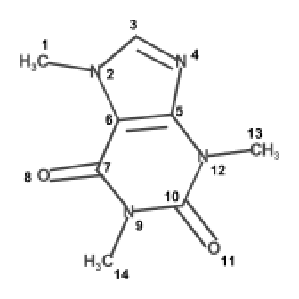
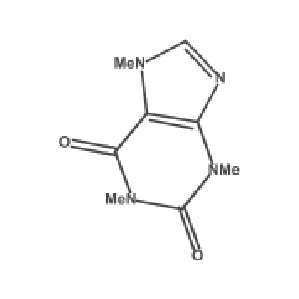
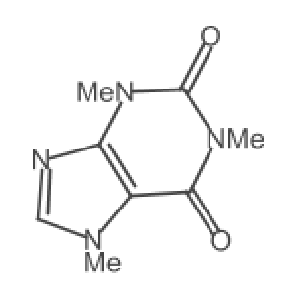
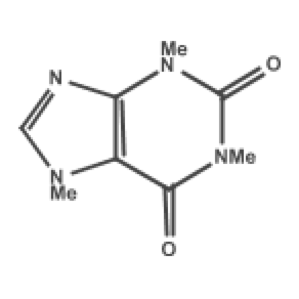
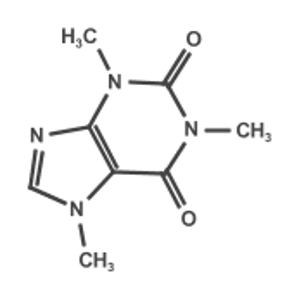
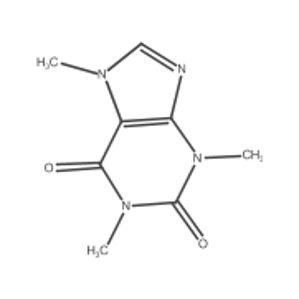
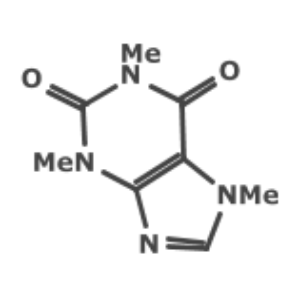
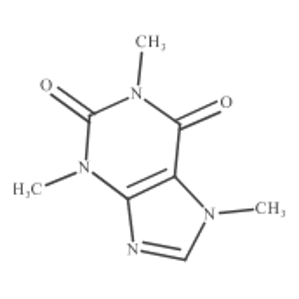


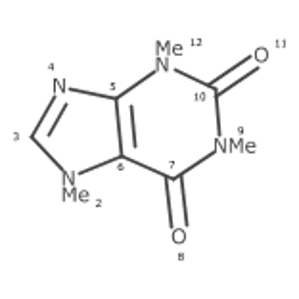
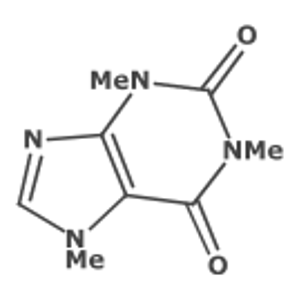
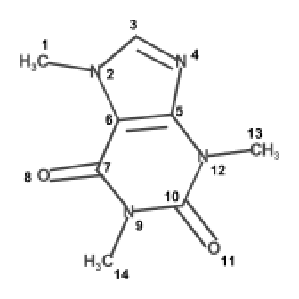
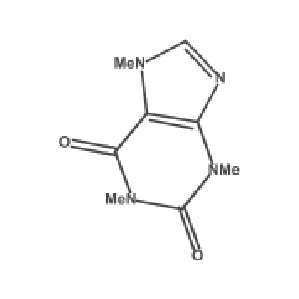
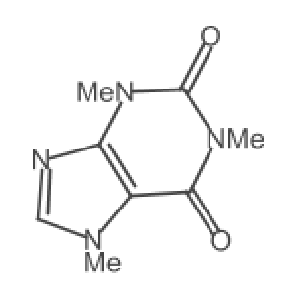
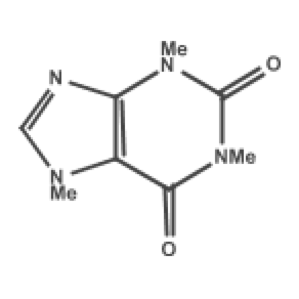
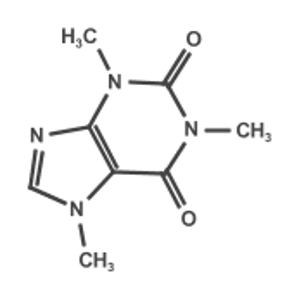
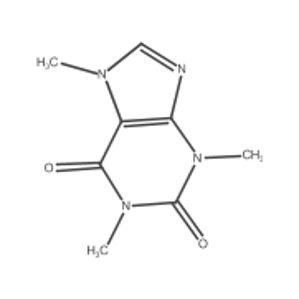
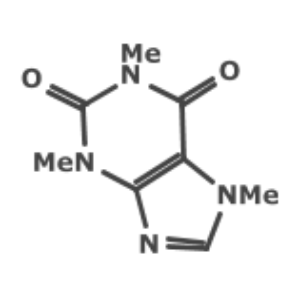
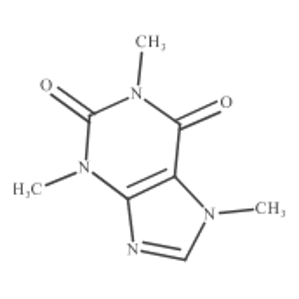

_________________ RDKit depictions _________________



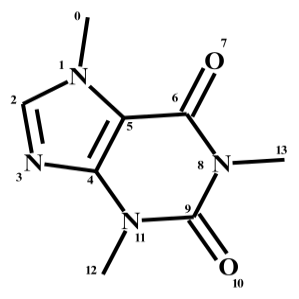
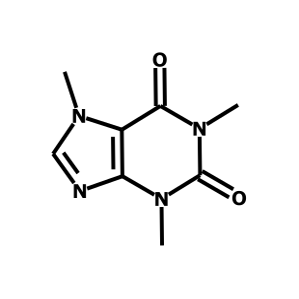
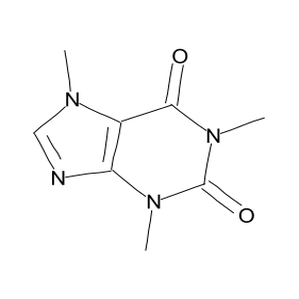
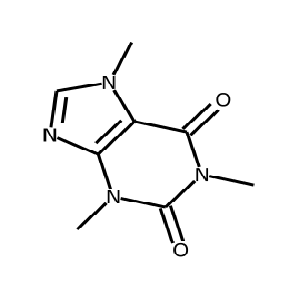
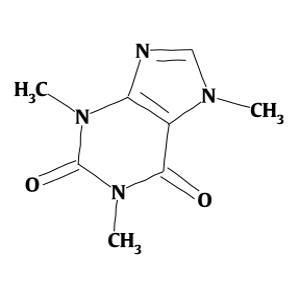
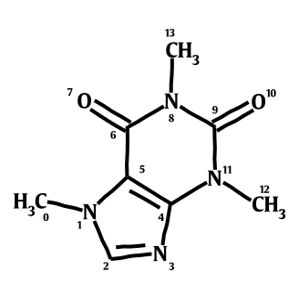
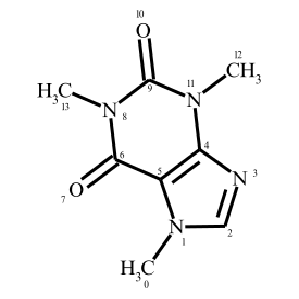
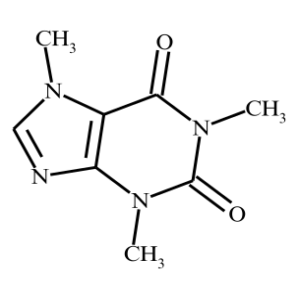
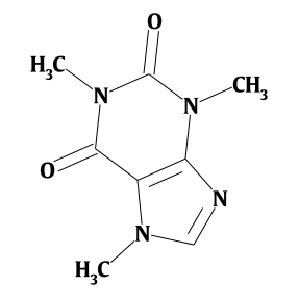
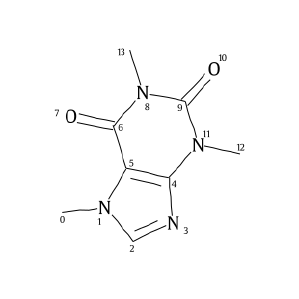


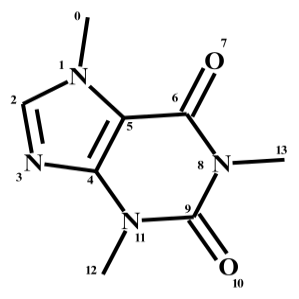
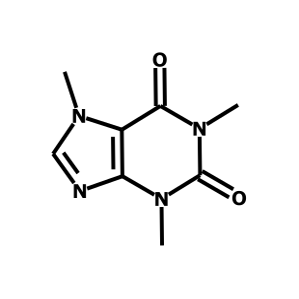
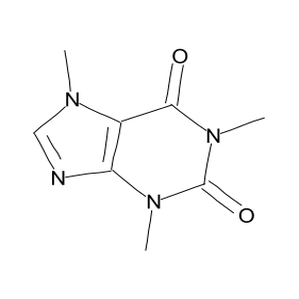
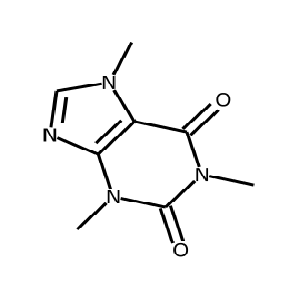
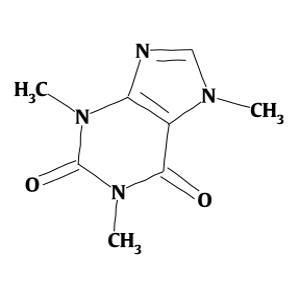
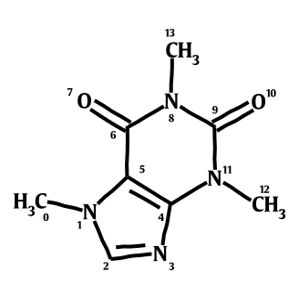
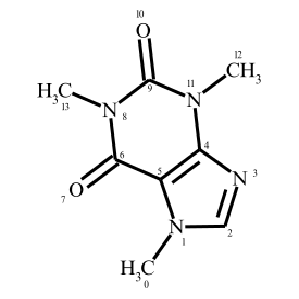
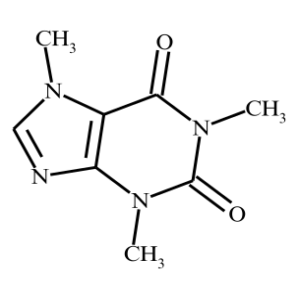
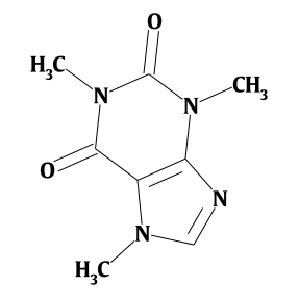
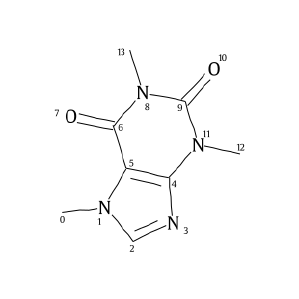

_________________ Indigo depictions _________________



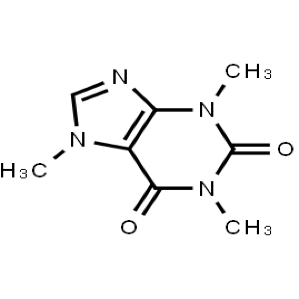
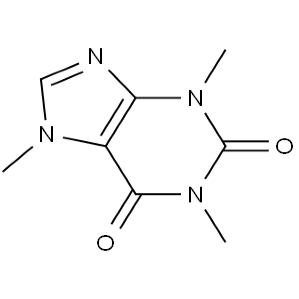
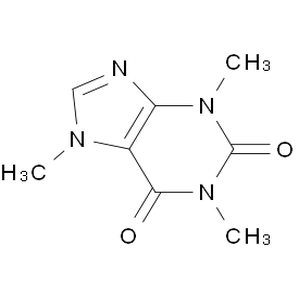
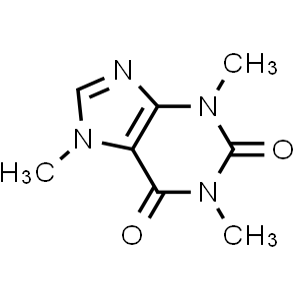
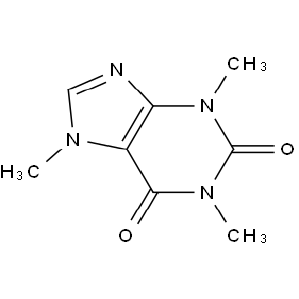
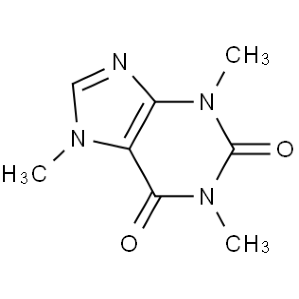
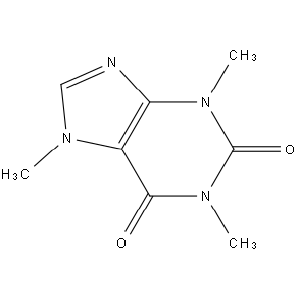
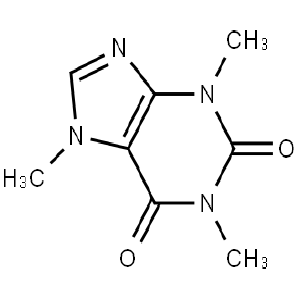
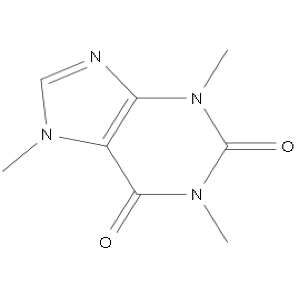
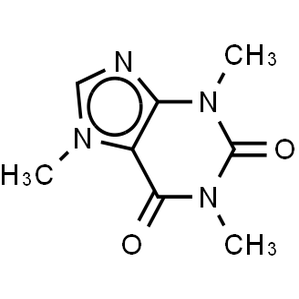


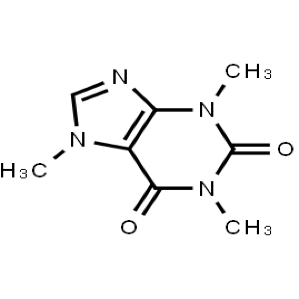
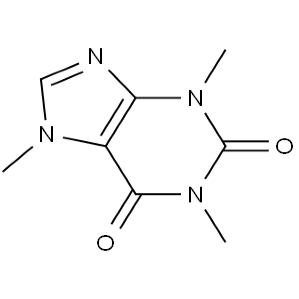
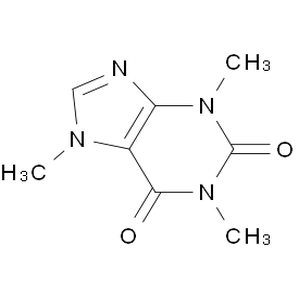
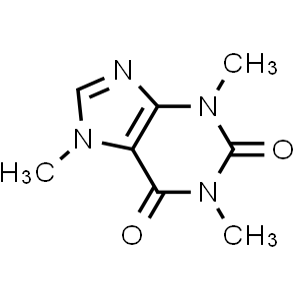
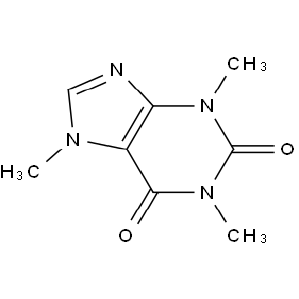
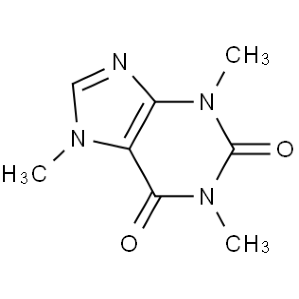
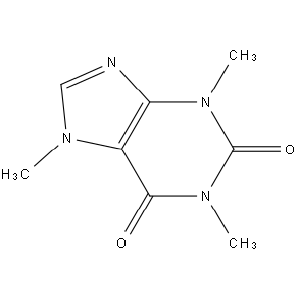
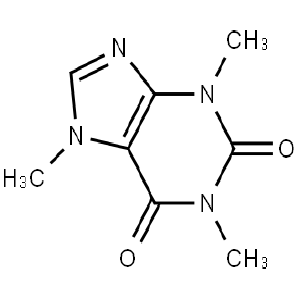
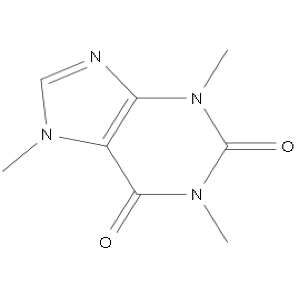
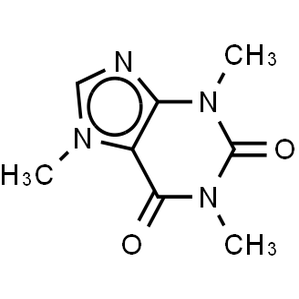

In [3]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
depiction_img_shape = (299,299)

# random_depictor can be called with a seed for reproducible results (defaults to 42)
with random_depictor(seed = 10) as depictor:
    # CDK depictions
    cdk_images = []
    for _ in range(10):
        cdk_images.append(depictor. depict_and_resize_cdk(smiles, depiction_img_shape))
    print("_________________", "CDK depictions", "_________________")
    ipyplot.plot_images(cdk_images, max_images=10, img_width=299)
    
    # RDKit Depictions
    rdkit_images = []
    for _ in range(10):
        rdkit_images.append(depictor.depict_and_resize_rdkit(smiles, depiction_img_shape))
    print("_________________", "RDKit depictions", "_________________")
    ipyplot.plot_images(rdkit_images, max_images=10, img_width=299)
    
    # Indigo Depictions
    indigo_images = []
    for _ in range(10):
        indigo_images.append(depictor.depict_and_resize_indigo(smiles, depiction_img_shape))
    print("_________________", "Indigo depictions", "_________________")
    ipyplot.plot_images(indigo_images, max_images=10, img_width=299)
    
    



## Depict chemical structures with a random toolkit

After calling an instance of random_depictor, the function
 - random_depiction(
       smiles: str, 
       image_shape: Tuple[int,int]
   )
 
The SMILES string needs to be given, the image_shape defaults to (299,299).

It returns an np.array which represents an RGB image of the chemical structure.


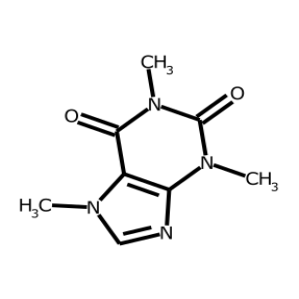
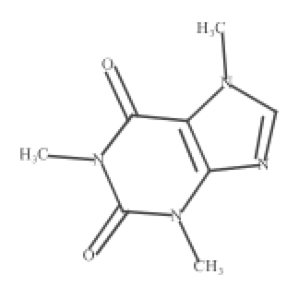
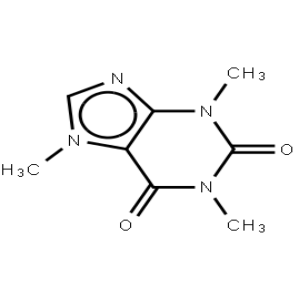
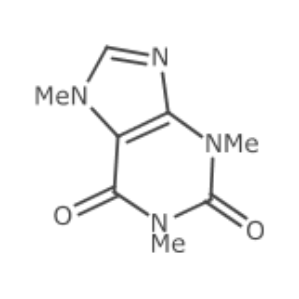
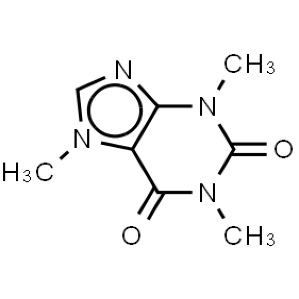
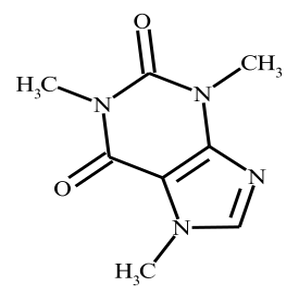
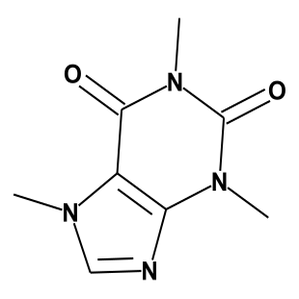
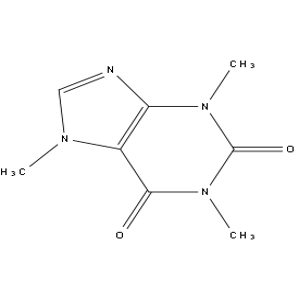
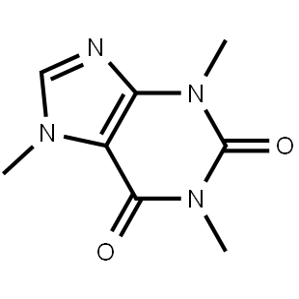
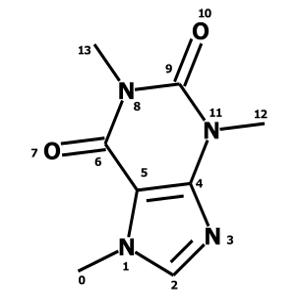
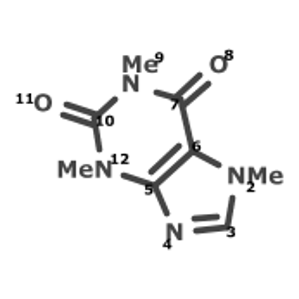
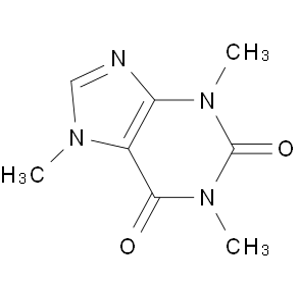
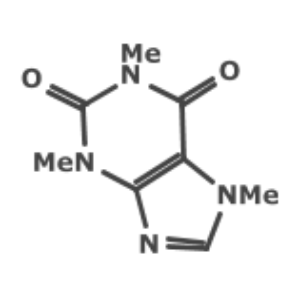
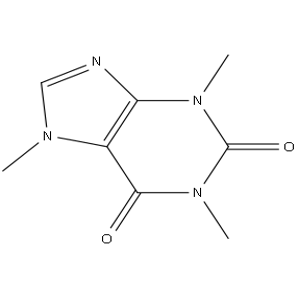
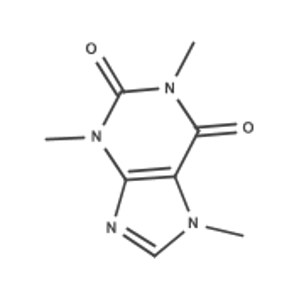
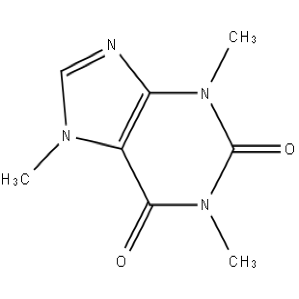
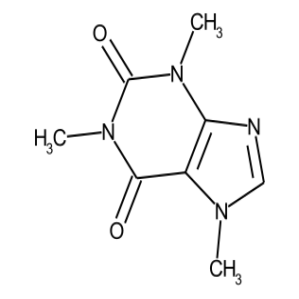
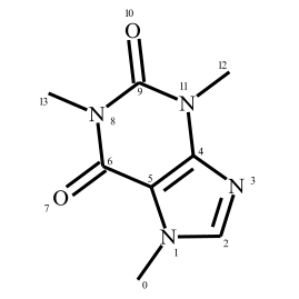
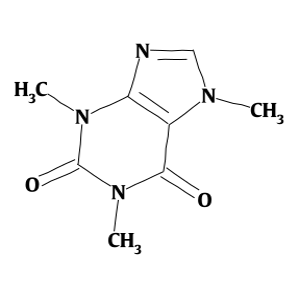
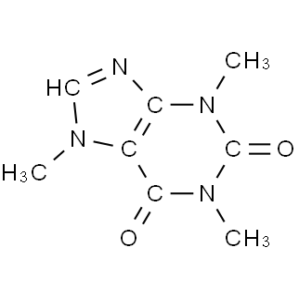


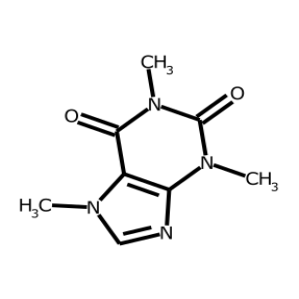
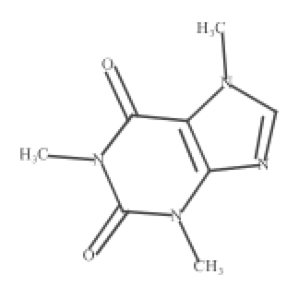
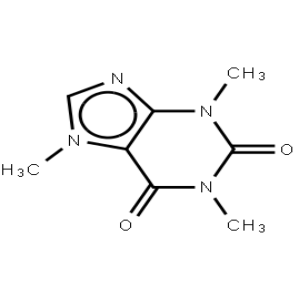
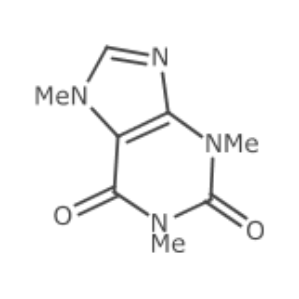
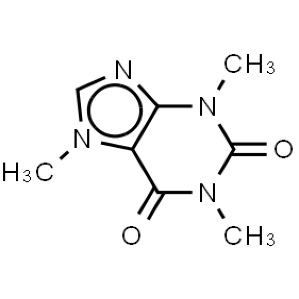
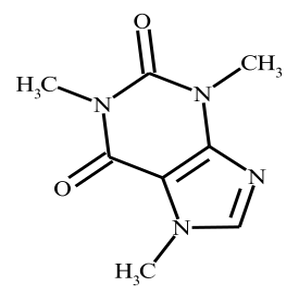
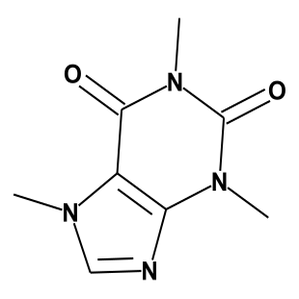
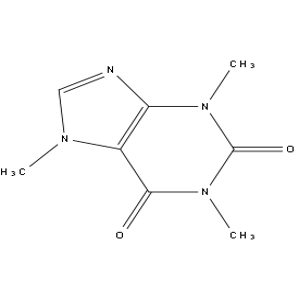
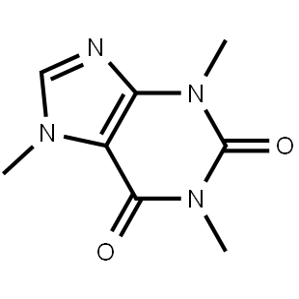
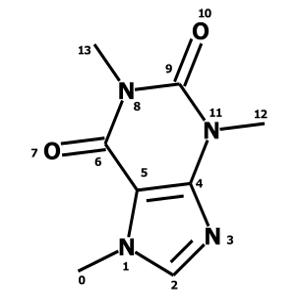
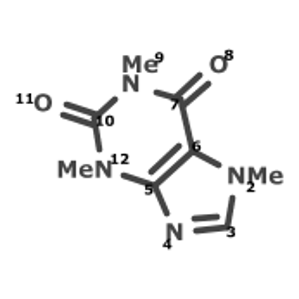
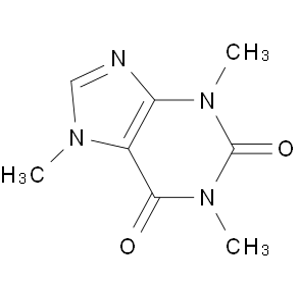
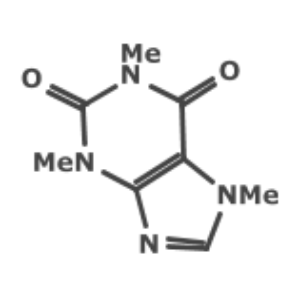
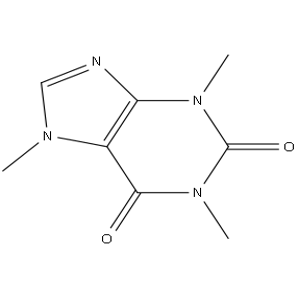
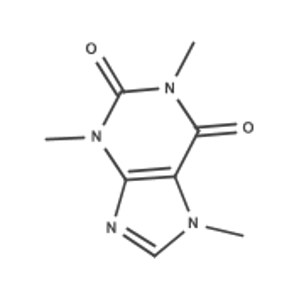
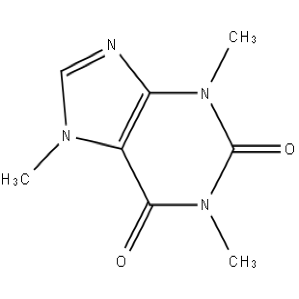
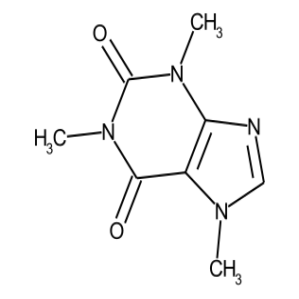
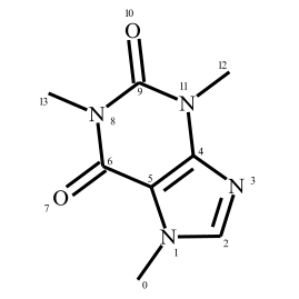
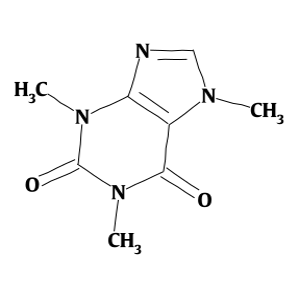
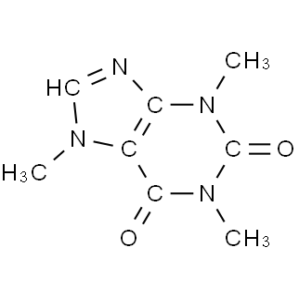

In [12]:
with random_depictor(1) as depictor:
    random_images = []
    for _ in range(20):
        random_images.append(depictor.random_depiction(smiles))

ipyplot.plot_images(random_images, max_images=20, img_width=299)

## Create random depictions with random augmentations

After calling an instance of random_depictor, this instance can simply be called as a function in order to generate a chemical structure depiction using CDK, RDKit or Indigo (randomly chosen) and apply random augmentations. The augmentations consist of random imgaug augmentations and randomly added chemical ID labels or curved arrows


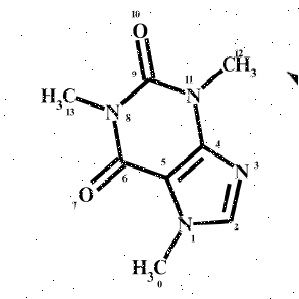
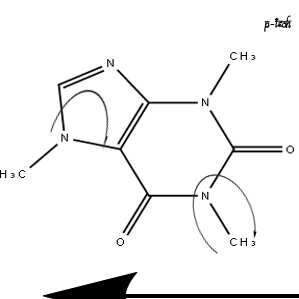
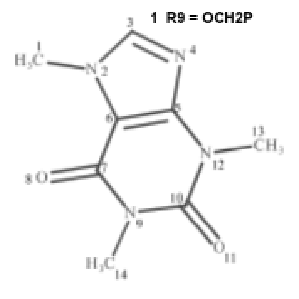
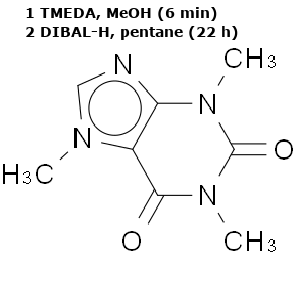
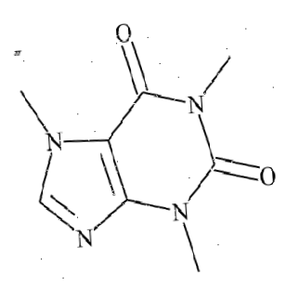
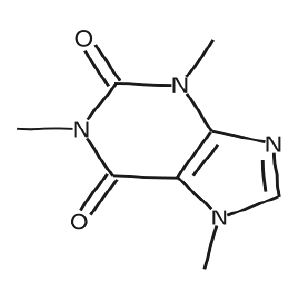
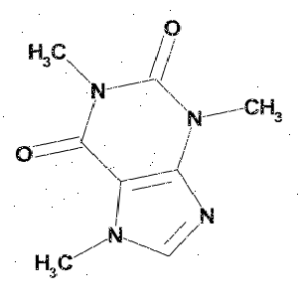
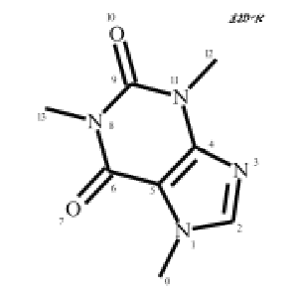
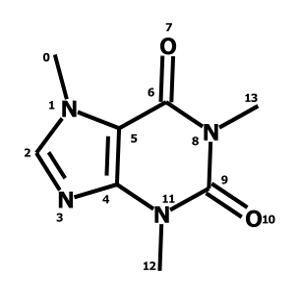
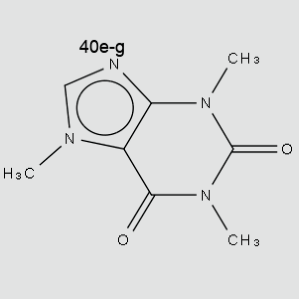
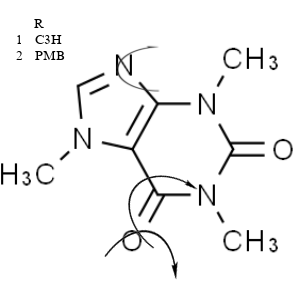
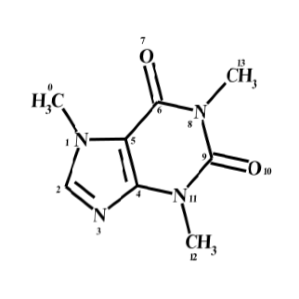
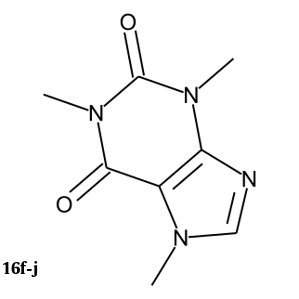
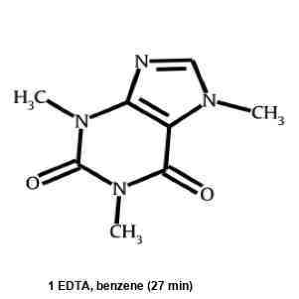
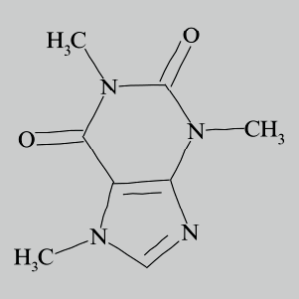
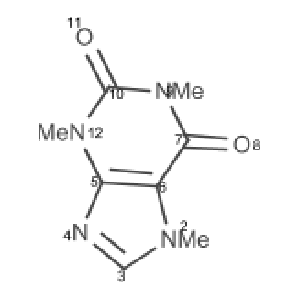
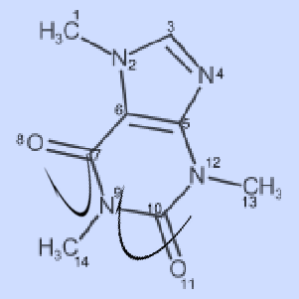
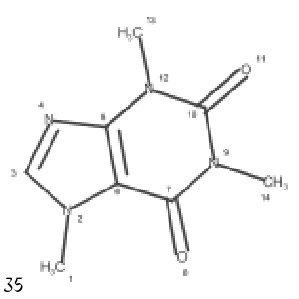
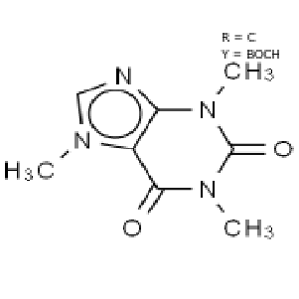
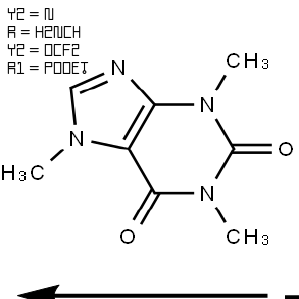


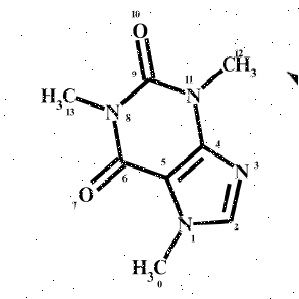
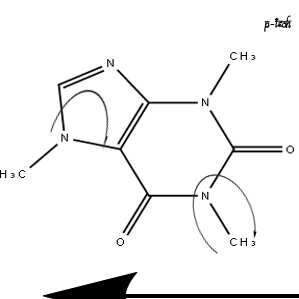
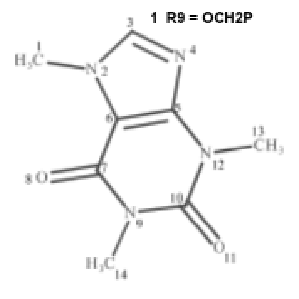
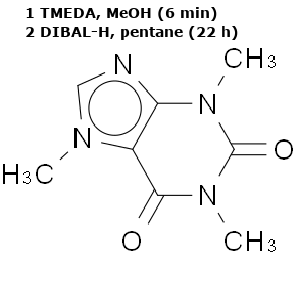
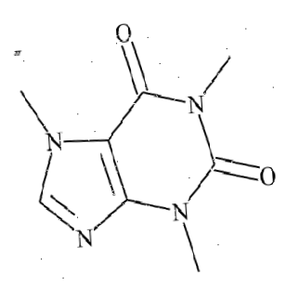
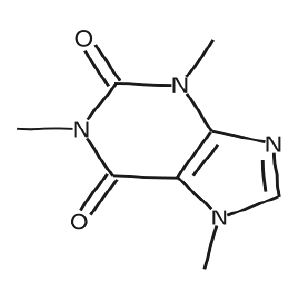
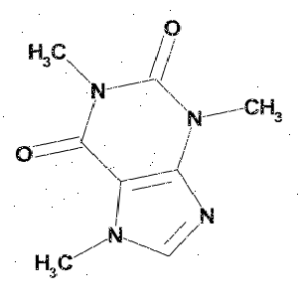
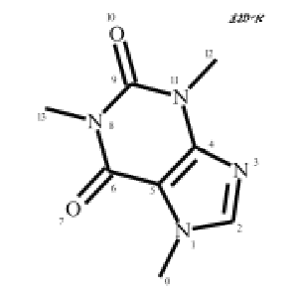
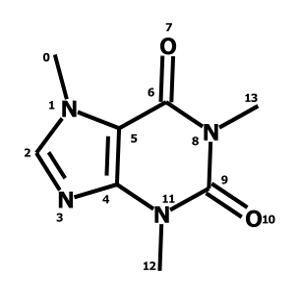
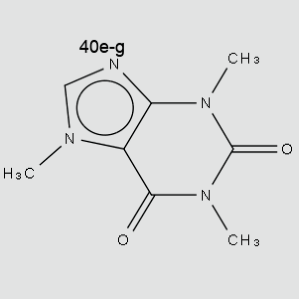
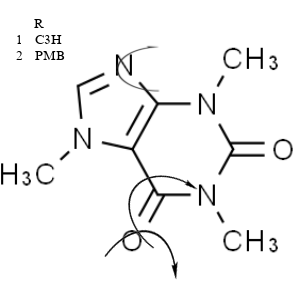
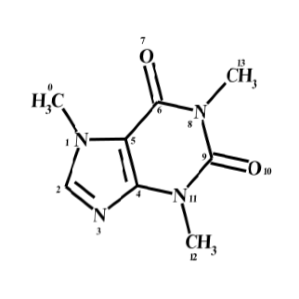
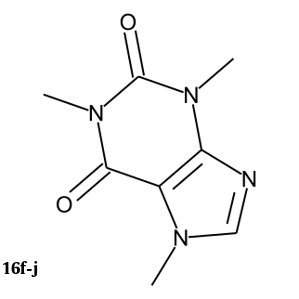
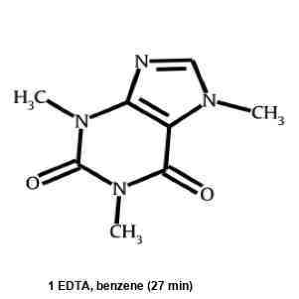
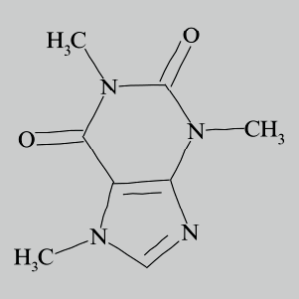
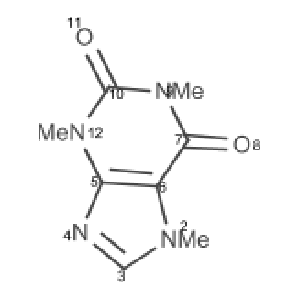
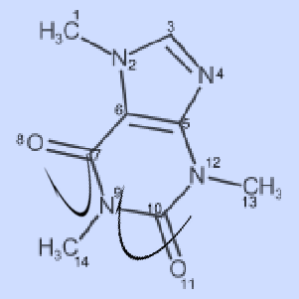
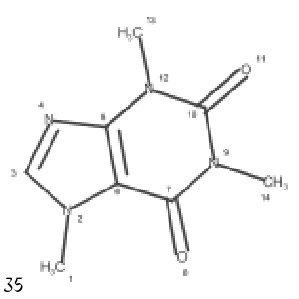
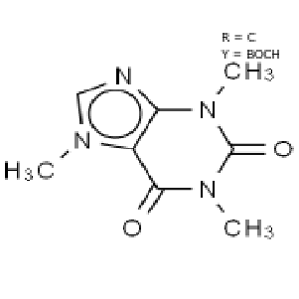
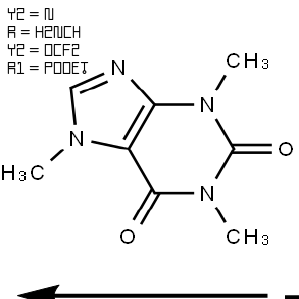

In [5]:
with random_depictor() as depictor:
    random_augmented_images = []
    for _ in range(20):
        #random_augmented_images.append(depictor(smiles))
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=299)

## 

## Create and save a batch of images

After calling an instance of random_depictor, simply call the functions

 - batch_depict_save(
        self,
        smiles_list: List[str],
        images_per_structure: int,
        output_dir: str,
        shape: Tuple[int, int] = (299, 299),
        ID_list: List[str] = False,
        processes: int = 4,
    )
 - def batch_depict_augment_save(
        self,
        smiles_list: List[str],
        images_per_structure: int,
        output_dir: str,
        shape: Tuple[int, int] = (299, 299),
        ID_list: List[str] = False,
        processes: int = 4,
    )
 
with a list of SMILES, the amount of images to create per SMILES, an output directory path and the desired size of the output images. If desired, a list of IDs of the same length as smiles_list give the created images specific file names.

In [10]:
if not os.path.exists('not_augmented'):
        os.mkdir('not_augmented')
        
if not os.path.exists('augmented'):
        os.mkdir('augmented')
        
with random_depictor(42) as depictor:
    depictor.batch_depict_save([smiles], 20, 'not_augmented', (299, 299), ['caffeine'],5)
    depictor.batch_depict_augment_save([smiles], 20, 'augmented', (299, 299), ['caffeine'],5)

In [14]:
from PIL import Image
from itertools import cycle
from typing import List

def create_figure(images: List, im_per_row: int, im_per_col:int):
    """
    Generates a grid of images in one big image

    Args:
        images (List): List of structure depictions (np.array)
        im_per_row (int): number of images per row in grid
        im_per_col (int): number of images per column in grid

    Returns:
        PIL.Image: Grid of images
    """
    y, x, _ = images[0].shape
    fig = Image.new('RGB', (x * im_per_row, y * im_per_col))
    y_iter = cycle([y * i for i in range(im_per_col)])
    for im_index in range(len(images)):
        x_pos = int(im_index/4) * x 
        y_pos = next(y_iter)
        pos = (x_pos, y_pos)
        fig.paste(Image.fromarray(images[im_index]), pos)
    return fig

# Generate Figure 2 for publication
figure_2 = create_figure(random_images, 5, 4)
figure_2.save("figure_2.png")
# Generate Figure 3 for publication
figure_3 = create_figure(random_augmented_images, 5, 4)
figure_3.save("figure_3.png")
